In [1]:
pip install --upgrade numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# For reading stock data from yahoo
from pandas_datareader import data
import yfinance as yf
from pandas_datareader import data as pdr

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# For time stamps
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
import warnings

# Ignore warnings for clarity
warnings.filterwarnings("ignore")

C:\Users\aq1\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
yf.pdr_override()

In [4]:
start = datetime(2010, 1, 1)
end = datetime(2019, 12, 31)

df = data.DataReader('AAPL', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.170479,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.236221,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.609924,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.583115,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.002029,144114400


In [6]:
df= df.reset_index()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [8]:
df=df.drop(['Date','Adj Close'],axis=1)

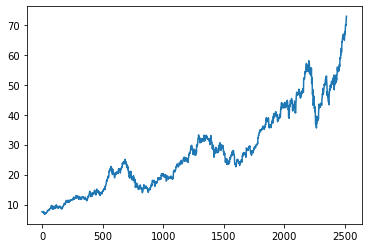

In [9]:
plt.plot(df.Close)

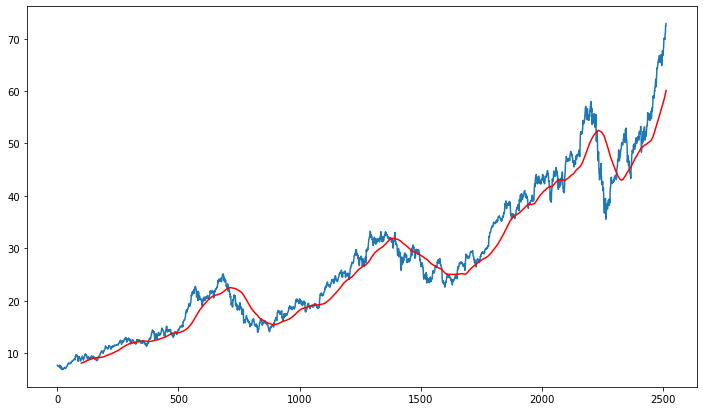

In [10]:
ma100 = df.Close.rolling(100).mean()
ma100

plt.figure(figsize=(12,7))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.show()

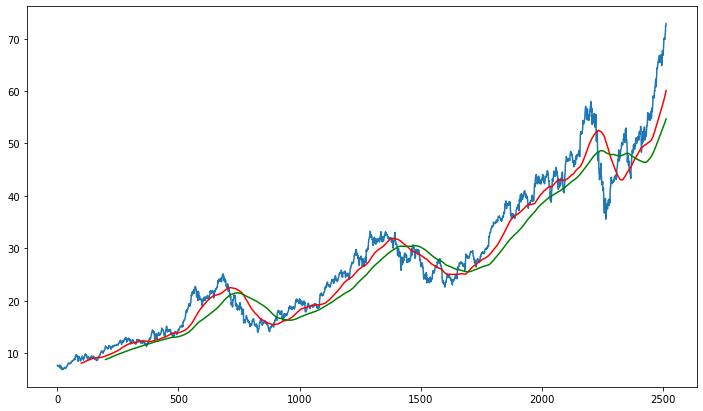

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

plt.figure(figsize=(12,7))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.show()

In [12]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])


print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [13]:
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [15]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [16]:
x_train.shape

(1660, 100, 1)

In [17]:
#LSTM MODEL
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 41s 522ms/step - loss: 0.0885
Epoch 2/50
52/52 [==============================] - 21s 410ms/step - loss: 0.0163
Epoch 3/50
52/52 [==============================] - 22s 422ms/step - loss: 0.0108
Epoch 4/50
52/52 [==============================] - 21s 403ms/step - loss: 0.0106
Epoch 5/50
52/52 [==============================] - 22s 417ms/step - loss: 0.0092
Epoch 6/50
52/52 [==============================] - 21s 400ms/step - loss: 0.0091
Epoch 7/50
52/52 [==============================] - 21s 400ms/step - loss: 0.0082
Epoch 8/50
52/52 [==============================] - 21s 407ms/step - loss: 0.0083
Epoch 9/50
52/52 [==============================] - 21s 401ms/step - loss: 0.0080
Epoch 10/50
52/52 [==============================] - 21s 398ms/step - loss: 0.0076
Epoch 11/50
52/52 [==============================] - 21s 399ms/step - loss: 0.0069
Epoch 12/50
52/52 [==============================] - 21s 406ms/step - loss: 0.0066
Epoch 13/50
5

In [20]:
model.save('keras_model.h5')

In [21]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [22]:
past_100_days = data_training.tail(100)

In [23]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [24]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [25]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [26]:
input_data.shape

(855, 1)

In [27]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [28]:
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [29]:
y_predicted = model.predict(x_test)

24/24 [==============================] - 4s 137ms/step


In [30]:
y_predicted.shape

(755, 1)

In [31]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [32]:
y_predicted

array([[0.12239784],
       [0.12319942],
       [0.12381849],
       [0.12423339],
       [0.12444456],
       [0.12447213],
       [0.12436989],
       [0.12420641],
       [0.12404424],
       [0.12393093],
       [0.12390594],
       [0.12397368],
       [0.12410524],
       [0.12430926],
       [0.1245704 ],
       [0.12487756],
       [0.12521438],
       [0.12556012],
       [0.12592453],
       [0.12633693],
       [0.1268081 ],
       [0.12732893],
       [0.12787205],
       [0.12853917],
       [0.12948766],
       [0.13080144],
       [0.13253334],
       [0.13471624],
       [0.1373373 ],
       [0.14034435],
       [0.1436564 ],
       [0.14720987],
       [0.15096964],
       [0.15490627],
       [0.15896839],
       [0.16309565],
       [0.16724434],
       [0.17137998],
       [0.1754517 ],
       [0.17940886],
       [0.1832045 ],
       [0.18679288],
       [0.19020265],
       [0.19345093],
       [0.19655445],
       [0.19950254],
       [0.2022827 ],
       [0.204

In [34]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

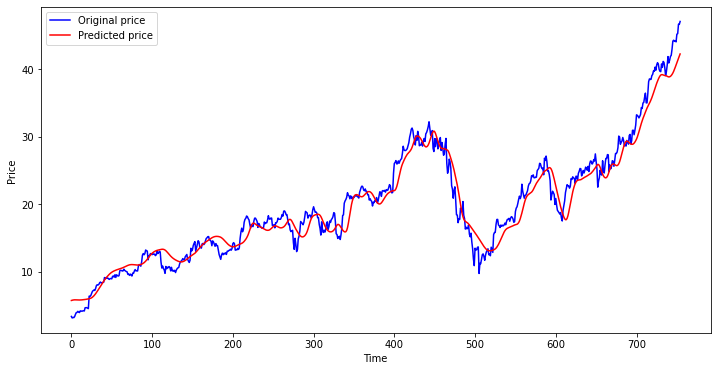

In [36]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original price')
plt.plot(y_predicted, 'r', label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()